<a href="https://colab.research.google.com/github/Hipolito-zenteno/vale/blob/main/AnalisisDatos_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib #.pyplot as plt1
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Importando el conjunto de datos
df = pd.read_csv('picos_intensidad.csv',sep=';')

In [ ]:
df.head()

,Fecha,SAG Run Sts,Presion,Intensidad de impactos,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
0,21-ago-20 07:00:00,Shutdown,Shutdown,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,Shutdown,Shutdown,Shutdown,Shutdown,Shutdown
1,21-ago-20 07:01:00,Shutdown,341.994812,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,Shutdown,Shutdown,Shutdown,Shutdown,Shutdown
2,21-ago-20 07:02:00,Shutdown,339.9818726,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,Shutdown,Shutdown,Shutdown,Shutdown,Shutdown
3,21-ago-20 07:03:00,Shutdown,336.7662659,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,Shutdown,Shutdown,Shutdown,Shutdown,Shutdown
4,21-ago-20 07:04:00,Shutdown,334.7826538,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,Shutdown,Shutdown,Shutdown,Shutdown,Shutdown


In [ ]:
df.columns

Index(['Fecha', 'SAG Run Sts', 'Presion', 'Intensidad de impactos', 'Tonelaje',
       'Velocidad', '%Solidos', 'Potencia', 'F80', 'Brazo'],
      dtype='object')

In [ ]:
df.shape
# 15K filas
# 12 columnas

(15420, 10)

# target: Intensidad de impactos

In [ ]:
df.count()

Fecha                     15420
SAG Run Sts               15420
Presion                   15420
Intensidad de impactos    15420
Tonelaje                  15420
Velocidad                 15420
%Solidos                  15420
Potencia                  15420
F80                       15420
Brazo                     15420
dtype: int64

In [ ]:
# Cantidad de filas con valores nulos
sum(df.isnull().values.ravel())

0

In [ ]:
df.shape[0]

15420

In [ ]:
# Garantizando que no existan filas con valores nulos
df = df.dropna()

In [ ]:
df.shape[0]

15420

In [ ]:
# Cantidad de filas con valores nulos
sum(df.isnull().values.ravel())

0

In [ ]:
df.dtypes

Fecha                     object
SAG Run Sts               object
Presion                   object
Intensidad de impactos    object
Tonelaje                  object
Velocidad                 object
%Solidos                  object
Potencia                  object
F80                       object
Brazo                     object
dtype: object

PREPARACION DE LOS DATOS

In [ ]:
##Tratamiento de datos invalidos
#-------------------------------------------
titles=list(df)
for col in titles:
    #Eliminar filas cuyo valor en columna tenga un dato vacio
    df=df.dropna(subset=[col])
    #Eliminar valores invalidos
    df = df.drop(df[(df[col]=='Bad') | (df[col]=='Shutdown') | (df[col]=='I/O Timeout')| (df[col]=='[-11059] No Good Data For Calculation') | (df[col]==' ')].index)
#Filtro Sag encendido
df = df.drop(df[df['SAG Run Sts']=='Stop'].index)
df = df.drop(['SAG Run Sts'], axis=1)
df.isnull().sum(axis=0)

Fecha                     0
Presion                   0
Intensidad de impactos    0
Tonelaje                  0
Velocidad                 0
%Solidos                  0
Potencia                  0
F80                       0
Brazo                     0
dtype: int64

In [ ]:
df.head()

,Fecha,Presion,Intensidad de impactos,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
316,21-ago-20 12:16:00,6144.825195,52.49315836,3323.114192,8.8313694,74.19773102,10869.20605,67.6027832,2.010852575
317,21-ago-20 12:17:00,6143.40332,52.8292538,3293.343421,8.832609177,74.46723938,10867.19141,67.42101288,1.994790077
318,21-ago-20 12:18:00,6139.657715,54.74063192,3331.12461,8.830718994,74.5040741,10795.39258,67.46234131,1.997226357
319,21-ago-20 12:19:00,6138.418945,57.07302068,3289.8794,8.838692665,74.49647522,10801.25879,67.08267212,2.005003929
320,21-ago-20 12:20:00,6135.470703,54.65946255,3286.992377,8.839502335,74.26107788,10883.07031,66.56684113,2.010220528


In [ ]:
df=df[['Presion','Intensidad de impactos','Tonelaje','Velocidad','%Solidos','Potencia','F80','Brazo']]
df=df.astype(float).round(2)

In [ ]:
df.head()

,Presion,Intensidad de impactos,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
316,6144.83,52.49,3323.11,8.83,74.20,10869.21,67.60,2.01
317,6143.40,52.83,3293.34,8.83,74.47,10867.19,67.42,1.99
318,6139.66,54.74,3331.12,8.83,74.50,10795.39,67.46,2.00
319,6138.42,57.07,3289.88,8.84,74.50,10801.26,67.08,2.01
320,6135.47,54.66,3286.99,8.84,74.26,10883.07,66.57,2.01


In [ ]:
df.dtypes

Presion                   float64
Intensidad de impactos    float64
Tonelaje                  float64
Velocidad                 float64
%Solidos                  float64
Potencia                  float64
F80                       float64
Brazo                     float64
dtype: object

In [ ]:
import numpy as np
import pandas as pd
# eliminando columnas ID, Default
#df.drop(['Fecha'], axis='columns', inplace=True)

In [ ]:
df.columns

Index(['Presion', 'Intensidad de impactos', 'Tonelaje', 'Velocidad',
       '%Solidos', 'Potencia', 'F80', 'Brazo'],
      dtype='object')

In [ ]:
# Revision descriptiva
df.describe()

,Presion,Intensidad de impactos,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,6015.786763,37.356645,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024
std,134.324754,17.453158,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976
min,5566.500000,13.270000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000
25%,5946.590000,20.570000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000
50%,6032.640000,36.090000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000
75%,6104.040000,52.120000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000
max,6483.500000,155.670000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000


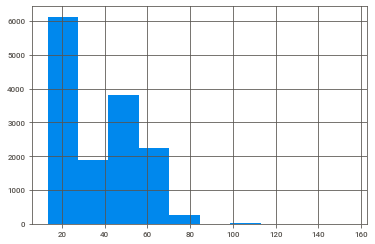

In [ ]:
# Exploracion de la variable Target
df.loc[:, "Intensidad de impactos"].hist()

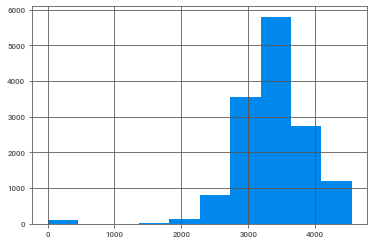

In [ ]:
df.loc[:, "Tonelaje"].hist()

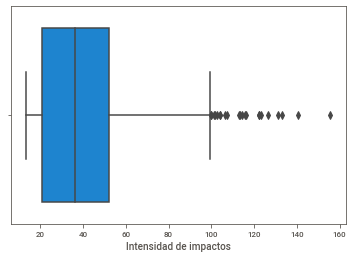

In [ ]:
ax = sns.boxplot(x=df['Intensidad de impactos'])

SELECCION DE VARIABLES

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


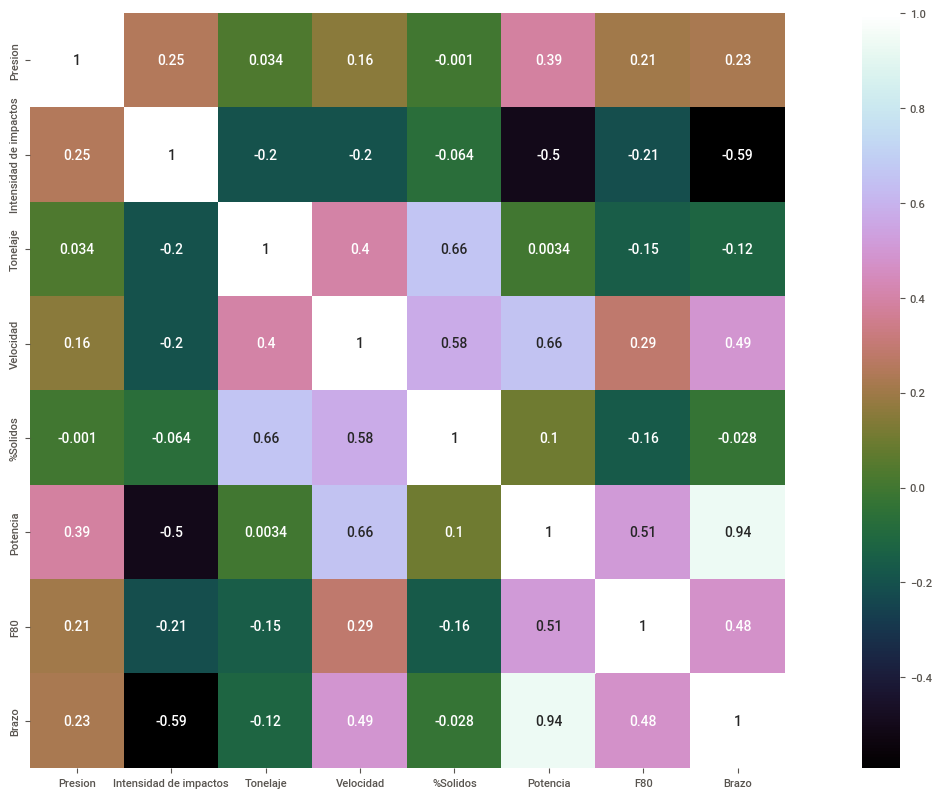

In [ ]:
#1. Analisis de Correlaciones de Pearson
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

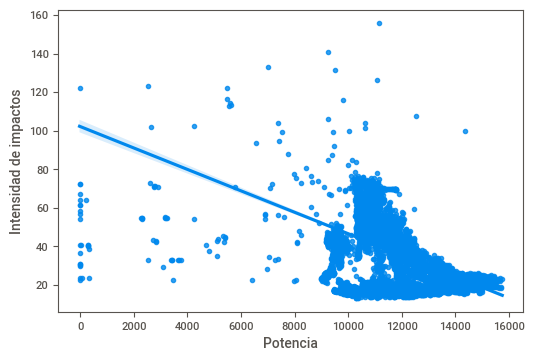

In [ ]:
# La variable más correlacionada
import seaborn as sns
sns.regplot(x=df["Potencia"], y=df["Intensidad de impactos"])

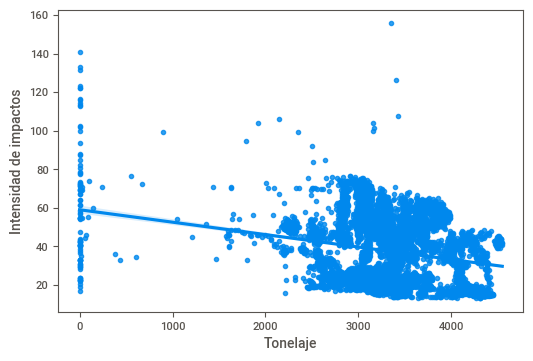

In [ ]:
# La variable menos correlacionada
import seaborn as sns
sns.regplot(x=df["Tonelaje"], y=df["Intensidad de impactos"])

In [ ]:
target_col = "Intensidad de impactos"

In [ ]:
# Definicion de variables de estudio
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [ ]:
df.shape

(14375, 8)

In [ ]:
X.shape

(14375, 7)

In [ ]:
y.shape

(14375,)

MUESTREO DE DATOS

In [ ]:
# realizamos una selección de muestra ENTRENAMIENTO Y VALIDACION aletoria y comparables muestras, con 
#fines de validar el aprendizaje de nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
X_train.shape

(10062, 7)

In [ ]:
X_test.shape

(4313, 7)

MODELAMIENTO DE DATOS

In [ ]:
X_with_constant = sm.add_constant(X_train)
# OLS: Ordinary Least Square (Minimos Cuadrados Ordinarios)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
X_with_constant

,const,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
9601,1.0,6096.08,3556.46,8.75,75.44,10549.28,73.47,1.98
10832,1.0,6148.50,4024.57,8.92,74.33,12068.26,59.46,2.21
10414,1.0,6009.57,3386.79,8.97,77.74,13504.70,60.74,2.50
10330,1.0,6054.93,3773.72,9.18,74.30,14215.22,80.32,2.56
2369,1.0,6079.42,3035.44,9.33,73.41,14357.92,76.13,2.53
...,...,...,...,...,...,...,...,...
6104,1.0,6049.42,3823.86,8.72,77.00,10598.25,55.30,2.00
14463,1.0,6044.22,3708.03,8.72,76.88,10626.20,74.67,2.02
6310,1.0,6069.04,3409.30,8.93,76.84,11188.53,73.65,2.07
1541,1.0,6104.08,3721.55,8.78,77.38,10840.62,68.22,2.04


In [ ]:
# Parametro del modelo lineal conseguido
# Ejecutar 2 veces en caso de necesitar mas iteraciones
# fit: entrenar / predict: predecir
results = model.fit()
results.params

const       -386.801251
Presion        0.076637
Tonelaje      -0.015518
Velocidad     20.337382
%Solidos      -0.067506
Potencia      -0.010244
F80           -0.015235
Brazo        -17.745614
dtype: float64

In [ ]:
print(results.mse_model)
print(results.mse_resid)
print(results.mse_model/results.mse_resid)
results.fvalue

318162.2005279167
85.89422919885978
3704.116137899288


3704.116137899288

EVALUACION DE DATOS

In [ ]:
# Resultado de nuestro modelamiento lineal
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Intensidad de impactos   R-squared:                       0.721
Model:                                OLS   Adj. R-squared:                  0.720
Method:                     Least Squares   F-statistic:                     3704.
Date:                    Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                            00:03:00   Log-Likelihood:                -36677.
No. Observations:                   10062   AIC:                         7.337e+04
Df Residuals:                       10054   BIC:                         7.343e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -386.8013      6.735    -57.435      0.000    -400.002    -373.600
Presion        0.0766      0.001     83.853      0.000       0.075       0.078
Tonelaje      -0.0155      0.000    -66.189      0.000      -0.016      -0.015
Velocidad     20.3374      0.355     57.282      0.000      19.641      21.033
%Solidos      -0.0675      0.021     -3.179      0.001      -0.109      -0.026
Potencia      -0.0102      0.000    -35.347      0.000      -0.011      -0.010
F80           -0.0152      0.008     -1.822      0.069      -0.032       0.001
Brazo        -17.7456      1.611    -11.018      0.000     -20.903     -14.588
==============================================================================
Omnibus:                     2007.221   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25376.349
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                      10.690   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Hipotesis nula: no es un regresor
# Hipotesis alternativa

# si tenemos un valor p-value <= 5% rechazamos la Hipotesis nula
# si tenemos un valor p-value > 5% aceptamos la hipotesis nula

Survival Estimator

In [ ]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Survival Curve')

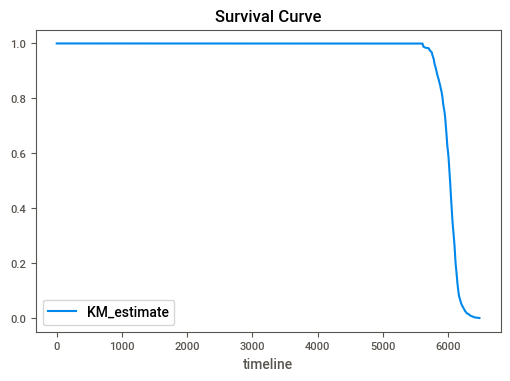

In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
kmf = KaplanMeierFitter()

T = df.Presion
E = df.Velocidad
kmf.fit(T,E)
kmf.survival_function_.plot()
plt.title('Survival Curve')

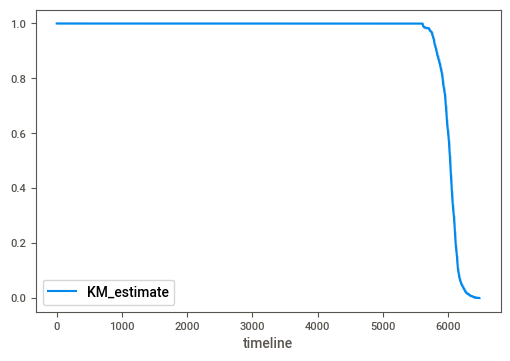

In [ ]:
kmf.plot()

In [ ]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.00,0,0,0,14375,14375
5566.50,1,1,0,0,14375
5571.00,1,1,0,0,14374
5571.60,1,0,1,0,14373
5581.00,1,1,0,0,14372
...,...,...,...,...,...
6475.81,1,1,0,0,7
6476.09,1,1,0,0,6
6480.29,1,1,0,0,5


In [ ]:
"""
ax = plt.subplot(111)

opc = (df["Presion"] == 1)

kmf.fit(T[opc], event_observed=E[opc], label="Presion")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~opc], event_observed=E[~opc], label="Paradas")
kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by SAG")

"""

'\nax = plt.subplot(111)\n\nopc = (df["Presion"] == 1)\n\nkmf.fit(T[opc], event_observed=E[opc], label="Presion")\nkmf.plot_survival_function(ax=ax)\n\nkmf.fit(T[~opc], event_observed=E[~opc], label="Paradas")\nkmf.plot_survival_function(ax=ax)\n\nplt.title("Survival curves by SAG")\n\n'

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
cph = CoxPHFitter()
cph.fit(df, duration_col='Tonelaje', event_col='Intensidad de impactos')

<lifelines.CoxPHFitter: fitted with 14375 total observations, 0 right-censored observations>

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 14375 total observations, 0 right-censored observations>
             duration col = 'Tonelaje'
                event col = 'Intensidad de impactos'
      baseline estimation = breslow
   number of observations = 14375
number of events observed = 14375
   partial log-likelihood = -120296.66
         time fit was run = 2022-07-09 00:03:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Presion    -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Velocidad  -0.38       0.69       0.04            -0.45            -0.30                 0.64                 0.74
%Solidos   -0.21       0.81       0.00            -0.22            -0.20                 0.81                 0.82
Potencia    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
F80         0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
Brazo       0.07       1.07       0.15            -0.22             0.35                 0.80                 1.42

            cmp to      z      p   -log2(p)
covariate                                  
Presion       0.00 -14.04 <0.005     146.36
Velocidad     0.00 -10.07 <0.005      76.88
%Solidos      0.00 -45.33 <0.005        inf
Potencia      0.00   3.04 <0.005       8.70
F80           0.00   7.06 <0.005      39.09
Brazo         0.00   0.46   0.65       0.63
---
Concordance = 0.66
Partial AIC = 240605.32
log-likelihood ratio test = 5898.91 on 6 df
-log2(p) of ll-ratio test = inf

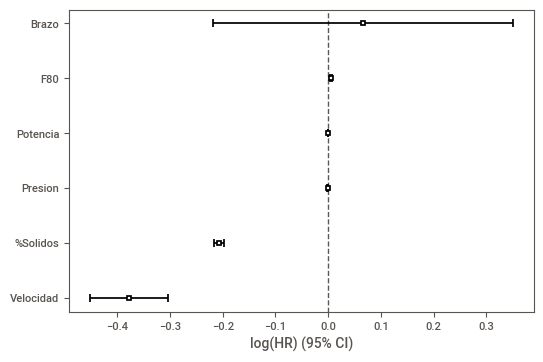

In [ ]:
cph.plot()

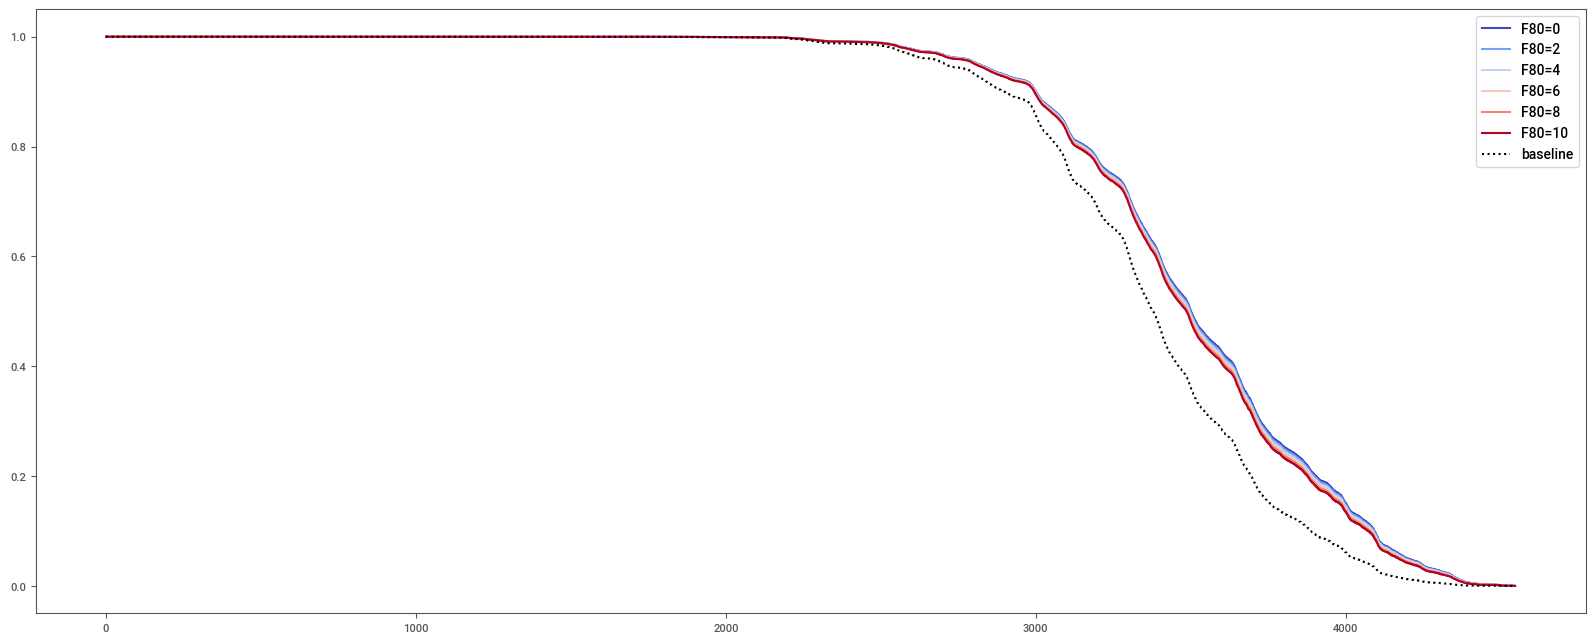

In [ ]:
cph.plot_partial_effects_on_outcome(covariates='F80', values=[0,2,4,6,8,10], cmap='coolwarm',figsize=(20,8))
plt.show()

In [ ]:
"""
plt.figure(figsize=(20,8))
surv_func = cph.predict_survival_function(df)
#exp_lifetime = cph.predict_expectation(df)
plt.plot(surv_func)
plt.legend(surv_func.columns)
plt.show()
"""

'\nplt.figure(figsize=(20,8))\nsurv_func = cph.predict_survival_function(df)\n#exp_lifetime = cph.predict_expectation(df)\nplt.plot(surv_func)\nplt.legend(surv_func.columns)\nplt.show()\n'